<a href="https://colab.research.google.com/github/emiletimothy24/CS159/blob/main/src/SyntheticDatasetWithVariance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc
import sklearn as sk
import pandas as pd
import seaborn as sns
import random
import matplotlib.cm as cm
import matplotlib
from sklearn import manifold, datasets, decomposition
import tensorflow as tf

In [ ]:
size = 6000
classes = 20
partition_size = int(size/classes)

In [ ]:
dataset = []
r=0
c=0
for class_number in range(classes):
  r = 10*np.random.random()
  standard_deviation = np.random.random()*2
  for time in range(partition_size):
    original_values = [np.sin(r),
                      np.cos(r),
                      np.tan(r),
                      np.exp(r),
                      np.sinh(r),
                      np.cosh(r),
                      np.tanh(r),
                      np.log(r+2),
                      1/np.sin(r),
                      1/np.cos(r),
                      1/np.tan(r),
                      1/np.sinh(r),
                      1/np.cosh(r),
                      1/np.tanh(r),
                      2*(r**3)+5*(r**2)+4*r,
                      2*np.sin(r) + 7*r - 4*np.log10(r+2),
                      r,
                      r**2,
                      r+np.sin(r)*np.cos(r)*np.tan(r),
                      r*np.sin(r)]
    errors = [np.random.normal(0.2, standard_deviation) for i in range(20)]
    entry = [original_values[i]+errors[i] for i in range(20)]
    for error in errors:
      entry.append(np.abs(error))
    y = class_number
    dataset.append([entry, y])

dataset = np.array(dataset)
X = []
for item in dataset[:,0]:
  X.append(item)
X = np.array(X)
Y = dataset[:,1]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


In [ ]:
X

array([[ 1.01146283,  0.01112789, -1.4521933 , ...,  0.05608038,
         0.32904534,  0.63801176],
       [ 0.33512491,  0.39947608, -0.8780631 , ...,  0.27655309,
         0.34248249,  0.17948902],
       [ 0.95088912, -0.57291005, -1.25462725, ...,  0.55508633,
         0.43811704,  0.02984601],
       ...,
       [-1.9300246 ,  0.53640945,  0.56452546, ...,  0.50977576,
         0.48009172,  0.46165572],
       [ 1.1533638 , -0.16387659, -0.68581286, ...,  0.49857005,
         0.79659277,  0.80942178],
       [ 0.2674922 , -0.87789659, -0.73039643, ...,  0.26095525,
         0.736634  ,  0.98981441]])

In [ ]:
df = pd.DataFrame()
for i in range(20):
  s="Variable" + str(i)
  df.insert(i,s,X[:,i])
for i in range(20):
  s="ErrorVariable" + str(i+20)
  df.insert(i+20,s,X[:,i+20])
df.insert(40,"Y",Y)

In [ ]:
perplexity=20
print("\n\nPerplexity = ", perplexity)
tsne = manifold.TSNE(n_components=2, init='random', method='barnes_hut', random_state=0, perplexity=perplexity,n_iter=650, verbose=2,learning_rate=1.5)
Yprime = tsne.fit_transform(X[:,0:20])



Perplexity =  20
[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 6000 samples in 0.001s...
[t-SNE] Computed neighbors for 6000 samples in 0.936s...
[t-SNE] Computed conditional probabilities for sample 1000 / 6000
[t-SNE] Computed conditional probabilities for sample 2000 / 6000
[t-SNE] Computed conditional probabilities for sample 3000 / 6000
[t-SNE] Computed conditional probabilities for sample 4000 / 6000
[t-SNE] Computed conditional probabilities for sample 5000 / 6000
[t-SNE] Computed conditional probabilities for sample 6000 / 6000
[t-SNE] Mean sigma: 0.064221
[t-SNE] Computed conditional probabilities in 0.551s
[t-SNE] Iteration 50: error = 95.1559753, gradient norm = 0.0000015 (50 iterations in 6.512s)
[t-SNE] Iteration 100: error = 95.1559753, gradient norm = 0.0000021 (50 iterations in 3.281s)
[t-SNE] Iteration 150: error = 95.1559677, gradient norm = 0.0000166 (50 iterations in 1.646s)
[t-SNE] Iteration 200: error = 95.1550140, gradient norm = 0.0003227 (50 itera

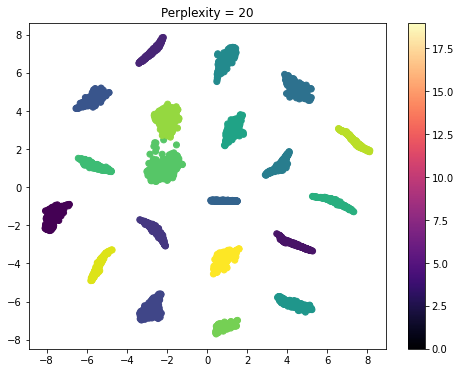

In [ ]:
fig = plt.figure(figsize=(8, 6))
ax = plt.axes()
string = "Perplexity = " + str(perplexity)
plt.title(string)
cmap = matplotlib.cm.get_cmap('magma')
normalize = matplotlib.colors.Normalize(vmin=min(Y), vmax=max(Y))
colors = [cmap(normalize(value)) for value in Yprime]
colors = [list(np.ndarray.flatten(np.array(i))) for i in colors]
sc = plt.scatter(Yprime[:,0], Yprime[:,1], c=Y)
cax, _ = matplotlib.colorbar.make_axes(ax)
cbar = matplotlib.colorbar.ColorbarBase(cax, cmap=cmap, norm=normalize)
plt.show()

In [ ]:
df.to_csv(r'C:\Users\Emile\Desktop\CS159ActualSyntheticData.csv', index=False)